/Users/a-nono/Documents/PYroMat-Tutorial/myvenv/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/Users/a-nono/Documents/PYroMat-Tutorial/myvenv/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


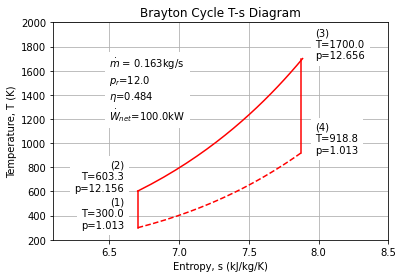

In [6]:
import pyromat as pyro
import numpy as np
import matplotlib.pyplot as plt

air = pyro.get('ig.air')
# Force the unit system into kJ,kg,bar,K
pyro.config['unit_energy'] = 'kJ'
pyro.config['unit_matter'] = 'kg'
pyro.config['unit_pressure'] = 'bar'
pyro.config['unit_temperature'] = 'K'

# Let's design a gas turbine with a 100kW power output
Wnet = 100.
# There are three processes separating four states in a brayton cycle.
# 
# (1) ---|Compressor|---> (2) ---|Combustor|---> (3) ---|Turbine|---> (4)
#
#(1) The inlet is ambient temperature and pressure.  In our example, we will
#   use 1.013bar and 300K for p1 and T1
p1 = 1.013
T1 = 300.

#|Compressor| is ideally an isentropic process designed to compress the 
# incoming air to a certain pressure ratio, pr.  Let's use pr=12.
pr = 12.

#(2) Nothing about the compressor outlet is explicitly prescribed by design.
# We'll have to calculate our way here.
s1 = air.s(T1,p1)   # what was the entropy at (1)?
p2 = p1*pr
T2 = air.T_s(s=s1,p=p2)    # find T2 for s=s1 and p=p1*pr
# How much work did that require?
wc = air.h(T2,p2) - air.h(T1,p1)

#|Combustor| is where we add heat.  We have to be careful not to damage
#  the engine by adding too much heat.  We are limited by a maximum T3.
#  For argument's sake, let's use 1700K.  That's pretty darn hot.
T3 = 1700.
p3 = p2
# How much heat did that take?
qh = air.h(T3,p3) - air.h(T2,p2)

#|Turbine| is where we finally get our useful work.  Some of it will have to
# go to the compressor to keep things going.  The rest of it, we keep.
# The turbine outlet (4) is ambient pressure again, but its temperature
# will be based on the turbine performance.
s3 = air.s(T3,p3)
s4 = s3 # Isentropic expansion to p1
p4 = p1
T4 = air.T_s(s=s4,p=p4)
# How much work did we get?
wt = air.h(T3,p3) - air.h(T4,p4)
# How much is left after we keep the compressor running?
wnet = wt - wc

# How much mass flow do we need to hit our target power output?
mdot = Wnet / wnet

# What is our efficiency?
n = wnet / qh

# Generate some process diagrams
plt.close('all')
plt.figure(1)
# isentropic compression is a vertical line
plt.plot([s1,s1],[T1,T2],'r',linewidth=1.5)
# constant pressure heat addition
T = np.linspace(T2,T3,20)
plt.plot(air.s(T=T,p=p2),T,'r',linewidth=1.5)
# isentropic expansion
plt.plot([s3,s3],[T3,T4],'r',linewidth=1.5)
# The pseudo heat rejction process 
T = np.linspace(T1,T4,20)
plt.plot(air.s(T=T,p=p1),T,'r--',linewidth=1.5)
# broaden the axes ranges
ax = plt.gca()
ax.set_xlim([6.1,8.5])
ax.set_ylim([200,2000])
# add labels and turn on the grid
plt.xlabel('Entropy, s (kJ/kg/K)')
plt.ylabel('Temperature, T (K)')
plt.grid('on')
# Add state labels
plt.text(s1-.1,T1,'(1)\nT={:.1f}\np={:.3f}'.format(float(T1),float(p1)),
    ha='right',backgroundcolor='white')
plt.text(s1-.1,T2,'(2)\nT={:.1f}\np={:.3f}'.format(float(T2),float(p2)),
    ha='right',backgroundcolor='white')
plt.text(s3+.1,T3,'(3)\nT={:.1f}\np={:.3f}'.format(float(T3),float(p3)),
    ha='left',backgroundcolor='white')
plt.text(s3+.1,T4,'(4)\nT={:.1f}\np={:.3f}'.format(float(T4),float(p4)),
    ha='left',backgroundcolor='white')
# Add a summary
plt.text(6.5,1200,
"""$\dot{{m}}$ = {:.3f}kg/s
$p_r$={:.1f}
$\eta$={:.3f}
$\dot{{W}}_{{net}}$={:1}kW""".format(float(mdot),float(pr),float(n),float(Wnet)),
    backgroundcolor='white')
plt.title('Brayton Cycle T-s Diagram')

plt.show()
#plt.show(block=False)